## Problem Statement
Banking-Classification

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


## Psecudo Code

1.  Loading the dataset using pandas.
2.  Checking the data using Head,Shape,Describe,nunique
3.  Checking the Null Values.
4.  Checking Correlation between Features by using Heatmap,if correlation is high between features, drop either one of the feature.
5.  Droping features 
6.  Split the dataset into features (x) and target variable (y)
7.  Checking the Updated Data.
8.  Seperating the Numerical & Categorical columns.
9.  Converting the Numerical & Categorical columns into Data Frames.
10. Converting the Categorical Data into Numerical Data by using LabelEncoder.
11. Concating the converted Categorical data and Numerical data into single  train_data.
12. Scaling the features using MinMaxScaler() from scikit-learn.
13. Split the data into training and testing sets using train_test_split() from scikit-learn.
14. Initialize the KNN classifier with the desired hyperparameters using KNeighborsClassifier() from scikit-learn.
15. Defning the parameter Grid Search
16. Creating the Grid Search CV and fit to train data.
17. Evaluate the best hyper parameter & accuracy of the model using accuracy_score() from scikit-learn.
18. Print the accuracy score.


In [385]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [386]:
# Load dataset
train_data=pd.read_csv('/content/new_train.csv',nrows=1500)
test_data=pd.read_csv('/content/new_test (1).csv',nrows=1500)


In [387]:
# To check train data 
train_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [388]:
#To check test data
test_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [389]:
# to check train data shape
# shape includes no of records & features 
train_data.shape

(1500, 16)

In [390]:
# to check test data shape
# shape includes no of records & features 
test_data.shape


(1500, 13)

In [391]:
# Total count,Range,percentiles,standard deviation of each feature 
train_data.describe()

,age,duration,campaign,pdays,previous
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,39.840000,250.322667,2.561333,969.221333,0.164667
std,10.181331,249.795278,2.905604,169.386935,0.487555
min,19.000000,6.000000,1.000000,2.000000,0.000000
25%,32.000000,104.000000,1.000000,999.000000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000
75%,47.000000,305.250000,3.000000,999.000000,0.000000
max,86.000000,3366.000000,43.000000,999.000000,6.000000


In [392]:
test_data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,39.912000,3.790667,1.167333,3.748667,0.200667,1.112000,0.330667,0.386000,4.311333,2.064667,223.610667,2.239333,0.932000
std,9.157519,3.569408,0.632139,2.136166,0.400633,0.979164,0.723193,0.486993,2.295340,1.379041,157.716233,1.397386,0.360735
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,99.750000,1.000000,1.000000
50%,39.000000,2.500000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,177.000000,2.000000,1.000000
75%,48.000000,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,306.250000,3.000000,1.000000
max,55.000000,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,554.000000,5.000000,2.000000


In [393]:
#no of unique values in each feature 
train_data.nunique()

age             60
job             12
marital          4
education        7
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       548
campaign        24
pdays           14
previous         6
poutcome         3
y                2
dtype: int64

In [394]:
test_data.nunique()

age             30
job             12
marital          4
education        7
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       407
campaign         5
poutcome         3
dtype: int64

In [395]:
#info regarding class , index , non null values count , Data Types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          1500 non-null   int64 
 1   job          1500 non-null   object
 2   marital      1500 non-null   object
 3   education    1500 non-null   object
 4   default      1500 non-null   object
 5   housing      1500 non-null   object
 6   loan         1500 non-null   object
 7   contact      1500 non-null   object
 8   month        1500 non-null   object
 9   day_of_week  1500 non-null   object
 10  duration     1500 non-null   int64 
 11  campaign     1500 non-null   int64 
 12  pdays        1500 non-null   int64 
 13  previous     1500 non-null   int64 
 14  poutcome     1500 non-null   object
 15  y            1500 non-null   object
dtypes: int64(5), object(11)
memory usage: 187.6+ KB


In [396]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          1500 non-null   int64
 1   job          1500 non-null   int64
 2   marital      1500 non-null   int64
 3   education    1500 non-null   int64
 4   default      1500 non-null   int64
 5   housing      1500 non-null   int64
 6   loan         1500 non-null   int64
 7   contact      1500 non-null   int64
 8   month        1500 non-null   int64
 9   day_of_week  1500 non-null   int64
 10  duration     1500 non-null   int64
 11  campaign     1500 non-null   int64
 12  poutcome     1500 non-null   int64
dtypes: int64(13)
memory usage: 152.5 KB


In [397]:
#Total null values count in data 
train_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [398]:
test_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64

In [399]:
#correlation between features 
#If correlation is high we drop either one of the features
train_data.corr()

,age,duration,campaign,pdays,previous
age,1.000000,0.048006,-0.005261,-0.058550,0.035952
duration,0.048006,1.000000,-0.088477,-0.038973,0.011417
campaign,-0.005261,-0.088477,1.000000,0.040702,-0.063879
pdays,-0.058550,-0.038973,0.040702,1.000000,-0.598153
previous,0.035952,0.011417,-0.063879,-0.598153,1.000000


<AxesSubplot:>

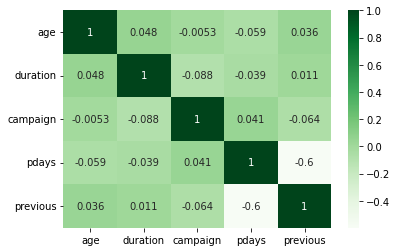

In [400]:
# features correlation with  visualization 
# features correlation indicated in colours & more correlated with white
sns.heatmap(train_data.corr(),annot=True,cmap='Greens')

In [401]:
test_data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
age,1.000000,-0.008197,-0.407022,-0.124446,0.194651,-0.005075,-0.044660,0.037839,-0.035638,0.035210,-0.023883,-0.003358,0.025652
job,-0.008197,1.000000,-0.015214,0.142269,-0.023787,-0.032226,-0.016067,-0.024100,-0.050014,0.016847,-0.003910,0.001893,-0.002255
marital,-0.407022,-0.015214,1.000000,0.100823,-0.082626,-0.023832,0.002922,-0.088601,-0.017997,-0.028492,0.022541,-0.032529,-0.008578
education,-0.124446,0.142269,0.100823,1.000000,-0.162408,-0.028633,0.035264,-0.080465,-0.094916,-0.024598,0.004394,0.017036,0.029749
default,0.194651,-0.023787,-0.082626,-0.162408,1.000000,0.000490,-0.001222,0.112199,-0.000516,0.006684,-0.009658,0.052384,0.025240
housing,-0.005075,-0.032226,-0.023832,-0.028633,0.000490,1.000000,0.011727,-0.047354,-0.002168,-0.031552,-0.018686,-0.006927,-0.002977
loan,-0.044660,-0.016067,0.002922,0.035264,-0.001222,0.011727,1.000000,-0.006546,-0.037946,-0.016104,-0.023792,0.006793,-0.008367
contact,0.037839,-0.024100,-0.088601,-0.080465,0.112199,-0.047354,-0.006546,1.000000,0.267210,-0.002426,-0.039108,0.103349,0.130525
month,-0.035638,-0.050014,-0.017997,-0.094916,-0.000516,-0.002168,-0.037946,0.267210,1.000000,0.061919,0.039721,-0.076907,-0.043703
day_of_week,0.035210,0.016847,-0.028492,-0.024598,0.006684,-0.031552,-0.016104,-0.002426,0.061919,1.000000,0.010081,-0.082120,0.041030


<AxesSubplot:>

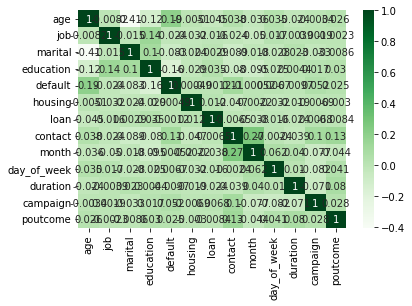

In [402]:
sns.heatmap(test_data.corr(),annot=True,cmap='Greens')

In [403]:
#Drop features may not required in model prediction 
xtr=train_data.drop(['pdays','previous','month','day_of_week','duration','y'],axis=1)
xte=test_data.drop(['month','day_of_week','duration'],axis=1)
ytr=train_data[['y']]
xtr

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,4,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,2,failure
2,78,retired,married,basic.4y,no,no,no,cellular,1,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,2,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,2,nonexistent
...,...,...,...,...,...,...,...,...,...,...
1495,60,admin.,married,basic.9y,no,no,no,cellular,2,failure
1496,26,student,single,basic.9y,no,yes,no,cellular,1,nonexistent
1497,42,admin.,married,university.degree,no,yes,no,cellular,1,nonexistent
1498,35,admin.,single,university.degree,unknown,no,no,cellular,1,nonexistent


In [404]:
#updated shape of train 
xtr.shape

(1500, 10)

In [405]:
# updated shape of test
xte.shape

(1500, 10)

In [406]:
# splitting numerical & categorical columns
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [407]:
#numerical features 
num_cols

['age', 'campaign']

In [408]:
#categorical features 
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [409]:
# converting numerical & categorical columns into data frames 
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

,job,marital,education,default,housing,loan,contact,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nonexistent
1,entrepreneur,married,university.degree,no,no,no,telephone,failure
2,retired,married,basic.4y,no,no,no,cellular,nonexistent
3,admin.,married,university.degree,no,yes,no,telephone,nonexistent
4,retired,divorced,university.degree,no,no,no,cellular,nonexistent
...,...,...,...,...,...,...,...,...
1495,admin.,married,basic.9y,no,no,no,cellular,failure
1496,student,single,basic.9y,no,yes,no,cellular,nonexistent
1497,admin.,married,university.degree,no,yes,no,cellular,nonexistent
1498,admin.,single,university.degree,unknown,no,no,cellular,nonexistent


In [410]:
xtr_num

,age,campaign
0,49,4
1,37,2
2,78,1
3,36,2
4,59,2
...,...,...
1495,60,2
1496,26,1
1497,42,1
1498,35,1


In [411]:
# converting categorical data into numerical data 
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols: 
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col]) 
    

In [412]:
xtr_cat

,job,marital,education,default,housing,loan,contact,poutcome
0,1,1,2,1,0,0,0,1
1,2,1,5,0,0,0,1,0
2,5,1,0,0,0,0,0,1
3,0,1,5,0,2,0,1,1
4,5,0,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1495,0,1,2,0,0,0,0,0
1496,8,2,2,0,2,0,0,1
1497,0,1,5,0,2,0,0,1
1498,0,2,5,1,0,0,0,1


In [413]:
#concatination of transformed categorical data & numerical data
train_data=pd.concat([xtr_cat,xtr_num],axis=1)

In [414]:
columns=train_data.columns
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'age', 'campaign'],
      dtype='object')

In [415]:
columns=xte.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'poutcome'],
      dtype='object')

In [416]:
#normalizing the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data=pd.DataFrame(scale.fit_transform(train_data),columns=columns)
test_data=pd.DataFrame(scale.fit_transform(xte),columns=columns)
test_data


,age,job,marital,education,default,housing,loan,contact,campaign,poutcome
0,0.206897,0.363636,0.000000,0.857143,0.0,0.0,0.0,0.0,1.00,0.5
1,0.379310,0.909091,1.000000,0.857143,0.0,0.0,0.0,0.0,0.00,0.5
2,1.000000,0.454545,0.000000,0.714286,1.0,1.0,0.0,0.0,0.25,0.5
3,0.620690,0.181818,0.333333,0.000000,1.0,0.0,0.0,1.0,0.25,0.5
4,0.068966,0.000000,0.666667,0.428571,0.0,0.0,0.0,0.0,0.25,0.5
...,...,...,...,...,...,...,...,...,...,...
1495,0.241379,0.090909,0.333333,0.000000,0.0,0.0,0.0,0.0,0.75,0.5
1496,0.655172,0.000000,0.333333,0.857143,0.0,0.0,0.0,1.0,0.00,0.5
1497,0.241379,0.272727,0.333333,0.428571,0.0,0.0,0.0,1.0,0.00,0.5
1498,0.206897,0.818182,0.333333,0.428571,0.0,0.0,0.0,0.0,0.00,0.5


In [417]:
#split data with test size of 30%
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(train_data,ytr,test_size=0.3,random_state=12345)
print(x_train.shape)
print(y_train.shape)
y_test.shape

(1050, 10)
(1050, 1)


(450, 1)

In [418]:
#import libraries for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [419]:
# define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7,9]}

In [420]:
knn = KNeighborsClassifier()

In [421]:
#creating grid search cv and and fit to train data 
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [422]:
#best hyper parameter and accuaracy predicted 
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 7}
0.8990476190476191


## Conclusion

This problem is important for banks because it allows them to identify potential customers who are more likely to subscribe to their services, and to target their marketing efforts more effectively.
It also allows them to better manage their resources and optimize their marketing strategies, ultimately leading to increased revenue and profitability.